## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. 

In [4]:
#import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [5]:
# Logistic Regression
from sklearn import linear_model

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline

In [6]:
import pickle

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

In [7]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

## Exploratory data analysis

In [8]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

No missing values present in the dataset

In [10]:
df.shape

(284807, 31)

Here we will observe the distribution of our classes

In [11]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(" normal % share",normal_share)
print(" fraud % share",fraud_share)

 normal % share 99.82725143693798
 fraud % share 0.1727485630620034


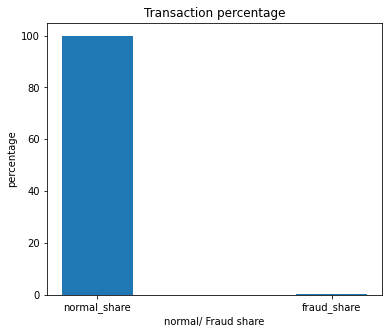

In [12]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

fig = plt.figure(figsize = (6, 5))
 
courses = ["normal_share","fraud_share"]
values = [normal_share,fraud_share]
  
    
# creating the bar plot
plt.bar(courses, values,
        width = 0.3)
 
plt.xlabel("normal/ Fraud share")
plt.ylabel("percentage")
plt.title("Transaction percentage")
plt.show()

Fraud Transactions are very less as compared to Normal Transactions

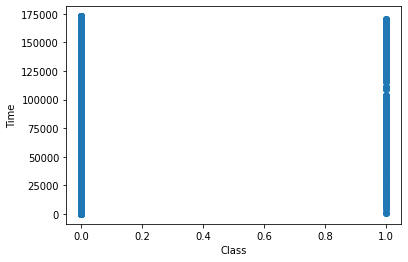

In [13]:
# Create a scatter plot to observe the distribution of classes with time

plt.scatter(df["Class"],df["Time"] )
plt.xlabel("Class")
plt.ylabel("Time")
plt.show()

'Time' Feature doesn't show any different behaviour in both class

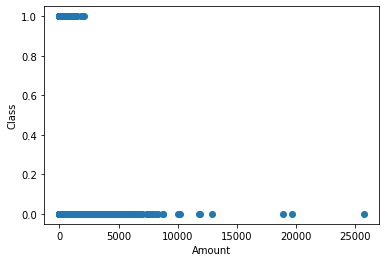

In [14]:
# Create a scatter plot to observe the distribution of classes with Amount

plt.scatter(df["Amount"],df["Class"] )
plt.xlabel("Amount")
plt.ylabel("Class")
plt.show()

Although all Fraud transaction are below 5000 but Normal Transaction also have transaction below 5000

In [15]:
# Drop unnecessary columns

#removing Time
df = df.drop("Time", axis=1)

#removing Amount
df = df.drop("Amount", axis=1)

### Splitting the data into train & test data

In [16]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [17]:
cols = df.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"

X = df.copy()
y = X.pop("Class")



In [18]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [19]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

c:\users\rsi22\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>],
       [<AxesSubplot:title={'center':'V11'}>,
        <AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>],
       [<AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>,
        <AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>],
       [<AxesSubplot:title={'center':'V21'}>,
        <AxesSubplot:title={'center':'V

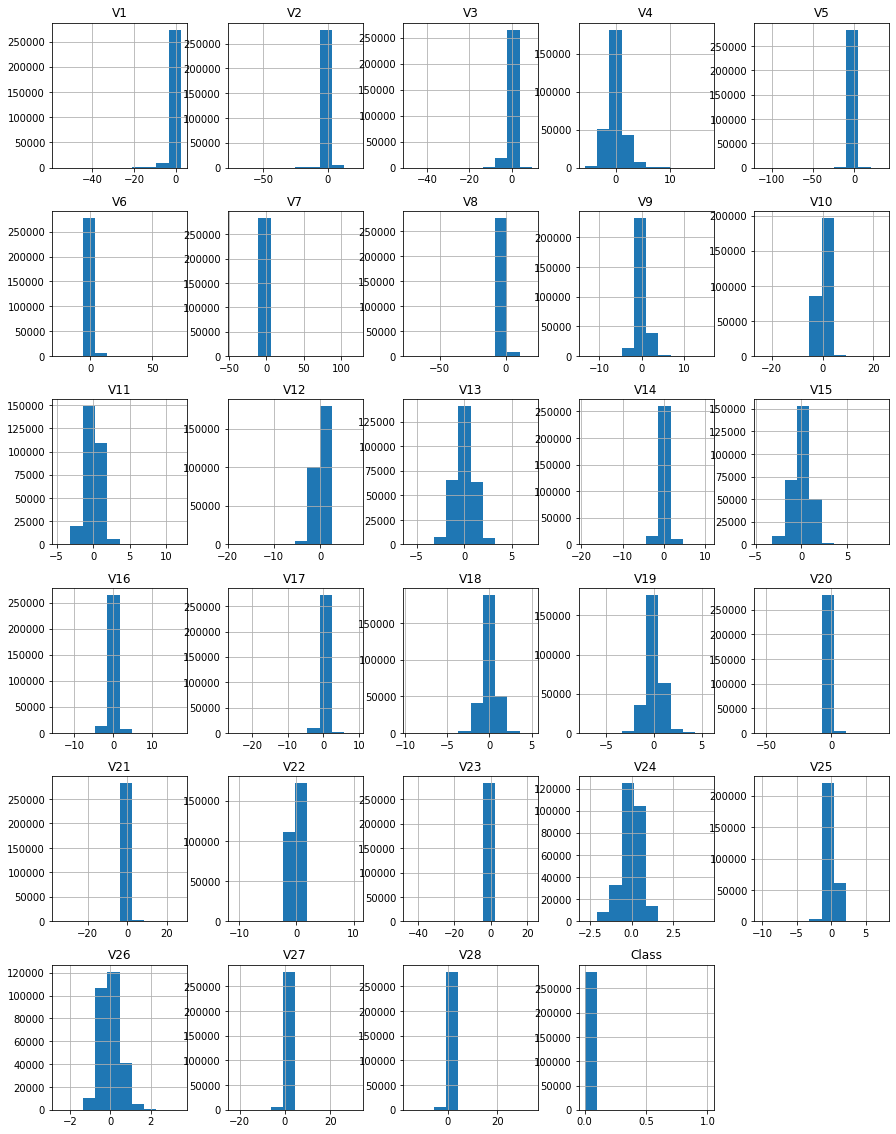

In [20]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

In [21]:
df.skew()

V1       -3.280667
V2       -4.624866
V3       -2.240155
V4        0.676292
V5       -2.425901
V6        1.826581
V7        2.553907
V8       -8.521944
V9        0.554680
V10       1.187141
V11       0.356506
V12      -2.278401
V13       0.065233
V14      -1.995176
V15      -0.308423
V16      -1.100966
V17      -3.844914
V18      -0.259880
V19       0.109192
V20      -2.037155
V21       3.592991
V22      -0.213258
V23      -5.875140
V24      -0.552499
V25      -0.415793
V26       0.576693
V27      -1.170209
V28      11.192091
Class    23.997579
dtype: float64

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [22]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn.preprocessing import PowerTransformer
from pandas import DataFrame

X_old= X_train.copy()

pt = PowerTransformer(copy=False)
#pt.fit(X_train)                       ## Fit the PT on training data
X_train_a = pt.fit_transform(X_train)    ## Then apply on all data
X_test_a = pt.transform(X_test)

X_train_pt = DataFrame(X_train_a,columns=X_train.columns.tolist())
X_test_pt = DataFrame(X_test_a,columns=X_test.columns.tolist())

y_train_pt= y_train
y_test_pt= y_test


In [23]:
X_train_pt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.590228,-0.084717,-0.313222,0.822608,0.497654,0.941153,-0.125953,0.124192,1.384900,-0.263636,...,0.450335,-0.164472,-0.396696,-0.768072,-0.514115,-2.448044,1.579851,-0.497778,-0.033114,-0.023078
1,-0.717857,-0.668647,0.678324,-1.119200,-0.775464,0.231042,-0.531180,0.655389,-0.483353,-0.338807,...,1.308522,0.470716,0.268694,0.092688,0.392669,-0.648458,-0.128521,-0.746788,-0.334496,-0.492631
2,0.654529,0.253578,-0.213639,0.736580,0.106367,-0.632150,0.417809,-0.318811,-0.586506,0.217270,...,0.047083,-0.104464,0.110598,0.319666,-0.294920,0.578739,1.705358,-0.625522,-0.030447,0.023178
3,0.621160,-0.124977,0.143189,0.039635,-0.335420,-0.330110,-0.079967,-0.119666,0.023912,-0.002059,...,0.603765,0.049278,-0.359932,-1.231978,0.172946,-0.043175,0.051407,1.001775,-0.180756,0.037524
4,-0.520046,0.216478,-1.308523,-2.798858,1.637066,2.078671,-0.454641,0.357446,-1.212380,0.171821,...,-0.619932,-0.228377,1.799059,1.794450,0.079596,1.311770,-1.192762,-0.297972,0.986078,0.743171


c:\users\rsi22\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>],
       [<AxesSubplot:title={'center':'V11'}>,
        <AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>],
       [<AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>,
        <AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>],
       [<AxesSubplot:title={'center':'V21'}>,
        <AxesSubplot:title={'center':'V

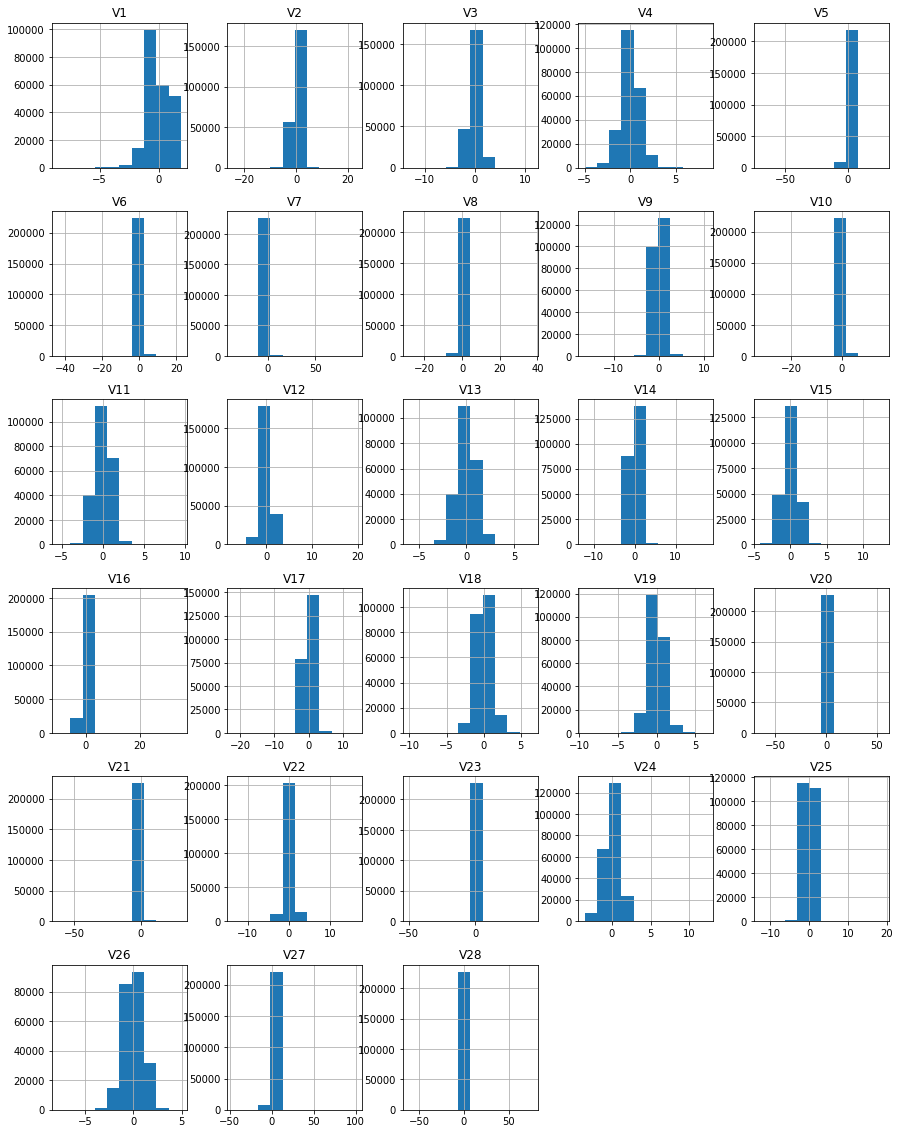

In [24]:
# plot the histogram of a variable from the dataset again to see the result 

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
X_train_pt.hist(ax = ax)

In [25]:
X_train_pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 28 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      227845 non-null  float64
 1   V2      227845 non-null  float64
 2   V3      227845 non-null  float64
 3   V4      227845 non-null  float64
 4   V5      227845 non-null  float64
 5   V6      227845 non-null  float64
 6   V7      227845 non-null  float64
 7   V8      227845 non-null  float64
 8   V9      227845 non-null  float64
 9   V10     227845 non-null  float64
 10  V11     227845 non-null  float64
 11  V12     227845 non-null  float64
 12  V13     227845 non-null  float64
 13  V14     227845 non-null  float64
 14  V15     227845 non-null  float64
 15  V16     227845 non-null  float64
 16  V17     227845 non-null  float64
 17  V18     227845 non-null  float64
 18  V19     227845 non-null  float64
 19  V20     227845 non-null  float64
 20  V21     227845 non-null  float64
 21  V22     22

In [26]:
X_train_pt.skew()

V1    -0.217245
V2     0.336101
V3    -0.079239
V4     0.017210
V5    -1.238701
V6    -1.933455
V7     2.723711
V8     2.307186
V9    -0.042155
V10   -1.257193
V11    0.062619
V12    0.165712
V13    0.005574
V14    0.102495
V15    0.012918
V16    0.158814
V17   -0.813877
V18   -0.057571
V19    0.016656
V20   -1.056167
V21   -2.011971
V22   -0.018401
V23   -0.253354
V24    0.114652
V25    0.082831
V26   -0.023831
V27    3.748787
V28    1.172397
dtype: float64

checking skew value differnace bafore applying PowerTransformer and after PowerTransformer

In [27]:
d = {'columns':X_train.columns.tolist(),'Before PowerTransformer': X_train.skew().tolist(), 'after PowerTransformer': X.skew().tolist()}
df_n1 = pd.DataFrame(data=d)
df_n1.set_index('columns')
df_n1

,columns,Before PowerTransformer,after PowerTransformer
0,V1,-0.217245,-3.280667
1,V2,0.336101,-4.624866
2,V3,-0.079239,-2.240155
3,V4,0.017210,0.676292
4,V5,-1.238701,-2.425901
5,V6,-1.933455,1.826581
6,V7,2.723711,2.553907
7,V8,2.307186,-8.521944
8,V9,-0.042155,0.554680
9,V10,-1.257193,1.187141


In [28]:
# save the model to disk
def SaveModel(filename,model):
    #filename = 'finalized_model.sav'
    pickle.dump(model, open(filename, 'wb'))
 

 
# load the model from disk
def LoadModel(filename):
    try:
        pickle_off=open (filename, "rb")
        loaded_model = pickle.load(pickle_off)
        #result = loaded_model.score(X_test, Y_test)
    except FileNotFoundError:
        print(filename,"not found")
        return False
    #print(result)
    return loaded_model

In [29]:
def printResults(y_test, y_pred_model):
    fig = plt.figure(figsize = (5,5))
    matrix_logit = confusion_matrix(y_test, y_pred_model)
    cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

    sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
    plt.title("Confusion Matrix Logit"), plt.tight_layout()
    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
    plt.show()
    
    
    #print("Accuracy Logit:",metrics.accuracy_score(y_test, y_pred_model))
    #print("Precision Logit:",metrics.precision_score(y_test, y_pred_model))
    #print("Recall Logit:",metrics.recall_score(y_test, y_pred_model))
    #print("F1 Score Logit:",metrics.f1_score(y_test, y_pred_model))
    
    #AUC
    fpr_logit, tpr_logit, _ = metrics.roc_curve(y_test,  y_pred_model)
    auc_logit = metrics.roc_auc_score(y_test, y_pred_model)
    #print("AUC :", auc_logit)
    
    result_dict={"Accuracy ":metrics.accuracy_score(y_test, y_pred_model),
                           "Precision ":metrics.precision_score(y_test, y_pred_model),
                          "Recall ":metrics.recall_score(y_test, y_pred_model),
                          "F1 Score ":metrics.f1_score(y_test, y_pred_model),
                "AUC ": auc_logit}
    result_df=pd.DataFrame(data=result_dict,
                           index=[0]).transpose()
    print("==================================**==================================")
    print(result_df)
    print("==================================**==================================")
    #ROC
    fig = plt.figure(figsize = (10,6))
    plt.plot(fpr_logit,tpr_logit,label="Logistic Regression, auc={:.3f})".format(auc_logit))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Logistic Regression ROC curve')
    plt.legend(loc=4)
    plt.show()
    
    fig = plt.figure(figsize = (10,6))
    logit_precision, logit_recall, _ = precision_recall_curve(y_test, y_pred_model)
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
    plt.plot(logit_recall, logit_precision, color='orange', label='Model')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend()
    plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [30]:
 #import the package
num_C = np.logspace(-3,3,7) #--> list of values
cv_num = 3   #--> list of values

In [31]:
def performLogisticRegression(X_train,y_train,filename,forceRun=0):
    
    if not forceRun:
        val=LoadModel(filename)
        print(val)
        if (False != val):
            return val
        
    folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
    grid={"C":num_C, "penalty":["l1","l2"]}# l1 lasso l2 ridge

    logreg=LogisticRegression()
    logreg_cv=GridSearchCV(logreg,grid,cv=folds,n_jobs=4,verbose=2,pre_dispatch=7)
    logreg_cv.fit(X_train,y_train)

    print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
    print("accuracy :",logreg_cv.best_score_)
    
    SaveModel(filename,logreg_cv)
    
    return logreg_cv

In [33]:
# cv results on powerTranformer data

model_logreg_pt = performLogisticRegression(X_train_pt,y_train_pt,"logreg_model.sav")
cv_results_pt = pd.DataFrame(model_logreg_pt.cv_results_)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(model_logreg_pt.best_params_)) 
print("Best score is {}".format(model_logreg_pt.best_score_))

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch=7, verbose=2)
Tuned Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l2'}
Best score is 0.9991836555553117


c:\users\rsi22\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.2.post1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\users\rsi22\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.22.2.post1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


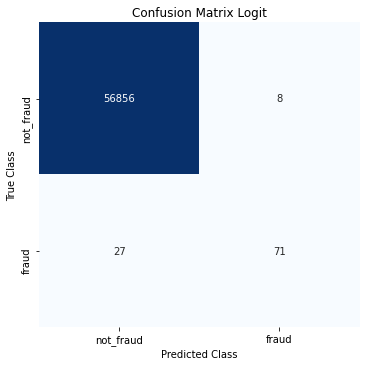

==================================**==================================
                   0
Accuracy    0.999386
Precision   0.898734
Recall      0.724490
F1 Score    0.802260
AUC         0.862175
==================================**==================================


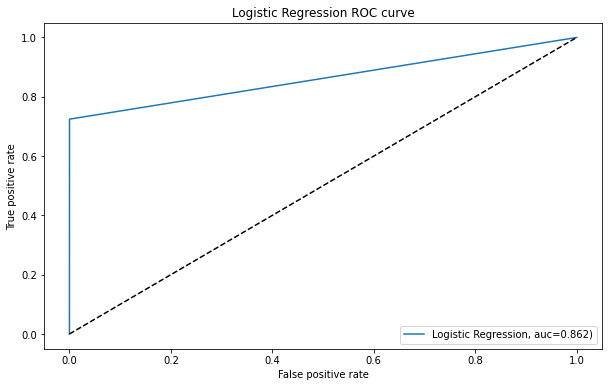

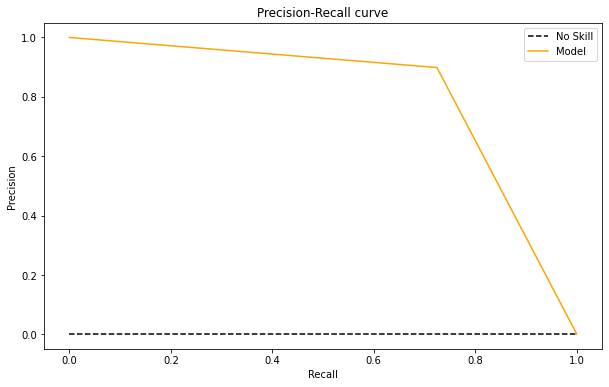

In [34]:
#predictions
y_pred_logit = model_logreg_pt.predict(X_test_pt)

printResults(y_test, y_pred_logit)

For logistic regression model on unblanaced data we are getting accuracy of 99.94% and precision of 90%
but getting low recall of 74.49%

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [35]:
# roc-auc curve confusion matrix

In [36]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

## Decision Tree ##

In [40]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def performDecisionTreeClassifier(X_train,y_train,filename,forceRun=0):
    if not forceRun:
        val=LoadModel(filename)
        if (False != val):
            return val
        
    # Setup the parameters and distributions to sample from: param_dist
    param_dist = {"max_depth": [3, None],
                  "max_features": randint(1, 9),
                  "min_samples_leaf": randint(1, 9),
                  "criterion": ["gini", "entropy"]}

    # Instantiate a Decision Tree classifier: tree
    tree = DecisionTreeClassifier()

    # Instantiate the RandomizedSearchCV object: tree_cv
    tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

    # Fit it to the data
    tree_cv.fit(X_train,y_train)

    # Print the tuned parameters and score
    #print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
    #print("Best score is {}".format(tree_cv.best_score_))
    
    #filename = 'DecisionTree_model.sav'
    SaveModel(filename,tree_cv)
    
    return tree_cv

In [41]:
model_dt_pt = performDecisionTreeClassifier(X_train_pt,y_train_pt,"DT_model.sav")
cv_results_dt_pt = pd.DataFrame(model_dt_pt.cv_results_)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(model_dt_pt.best_params_)) 
print("Best score is {}".format(model_dt_pt.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 6}
Best score is 0.9993548245517786


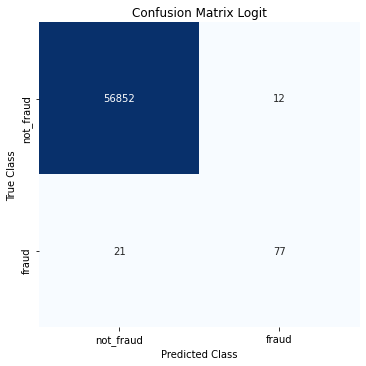

==================================**==================================
                   0
Accuracy    0.999421
Precision   0.865169
Recall      0.785714
F1 Score    0.823529
AUC         0.892752
==================================**==================================


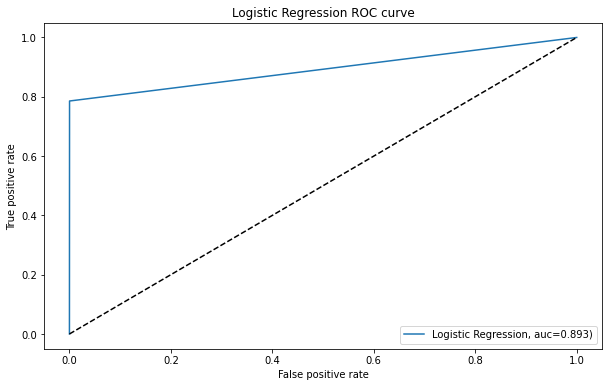

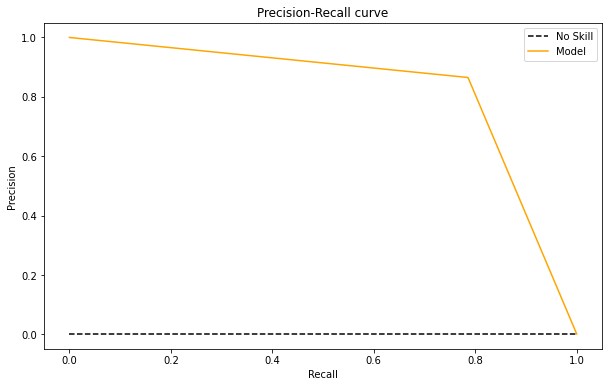

In [42]:
#predictions
y_pred_dt = model_dt_pt.predict(X_test_pt)

printResults(y_test, y_pred_dt)

For Decision Tree model on unbalanaced data we are getting accuracy of 99.69% and recall of 93.88%
but getting low precision of 35.80%

**Random Forest**

In [ ]:

def performRandomForestClassifier(X_train,y_train,filename,forceRun=0):
    if not forceRun:
        val=LoadModel(filename)
        if (False != val):
            return val
           
    # Running the random forest with default parameters.
    rfc = RandomForestClassifier()
    
    # Create the parameter grid based on the results of random search 
    param_grid = {
        'max_depth': [4,8,10],
        'min_samples_leaf': range(100, 400, 200),
        'min_samples_split': range(200, 500, 200),
        'n_estimators': [100,200, 300], 
        'max_features': [5, 10]
    }
    # Create a based model
    rf = RandomForestClassifier()
    
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                              cv = 3, n_jobs = 7,verbose = 2)
    
    # Fit the grid search to the data
    grid_search.fit(X_train,y_train)
    
    # printing the optimal accuracy score and hyperparameters
    print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)
    
    SaveModel(filename,grid_search)
    
    return grid_search


In [ ]:
model_randomForest_pt = performRandomForestClassifier(X_train_pt,y_train_pt,"Random_forest_model.sav")

cv_results_RandomForest = pd.DataFrame(model_randomForest_pt.cv_results_)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(model_randomForest_pt.best_params_)) 
print("Best score is {}".format(model_randomForest_pt.best_score_))

In [ ]:
#predictions
y_pred_RandomForest = model_randomForest_pt.predict(X_test_pt)

printResults(y_test, y_pred_RandomForest)

For Random Forest model on unbalanaced data we are getting accuracy of 99.94% and precision of 89.28%
but getting low recall of 76.53%

**XGBoost**

In [ ]:
def performXGBClassifier(X_train,y_train,filename,forceRun=0):
    if not forceRun:
        val=LoadModel(filename)
        if (False != val):
            return val
    
    # creating a KFold object 
    folds = 3

    # specify range of hyperparameters
    param_grid = {'max_depth': [2,4,8],
                  'learning_rate': [0.1, 0.3], 
                 'subsample': [0.2, 0.4, 0.6, 0.9]}          


    # specify model
    xgb_model = XGBClassifier()


    # set up GridSearchCV()
    model_cv = GridSearchCV(estimator = xgb_model, 
                            param_grid = param_grid, 
                            scoring= 'roc_auc', 
                            cv = folds, 
                            verbose = 2,
                            n_jobs=7,
                            return_train_score=True)   

    # fit the model
    model_cv.fit(X_train, y_train) 

    SaveModel(filename,model_cv)

    return model_cv

In [ ]:
model_cv_xgb = performXGBClassifier(X_train_pt,y_train_pt,"xgb_model.sav")
# cv results
cv_results_xgb = pd.DataFrame(model_cv_xgb.cv_results_)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(model_cv_xgb.best_params_)) 
print("Best score is {}".format(model_cv_xgb.best_score_))


In [ ]:
#predictions
y_pred_xgb = model_cv_xgb.predict(X_test_pt)

printResults(y_test, y_pred_xgb)

In [ ]:
# # plotting
plt.figure(figsize=(25,8))

param_grid = {'learning_rate': [0.1, 0.3], 
             'subsample': [0.2, 0.4, 0.6, 0.9]} 

cv_results = pd.DataFrame(model_cv_xgb.cv_results_)

for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df_xg = cv_results[cv_results_xgb['param_subsample']==subsample]

    plt.plot(df_xg["param_learning_rate"], df_xg["mean_test_score"])
    plt.plot(df_xg["param_learning_rate"], df_xg["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

For XGBoost model on unbalanaced data we are getting accuracy of 99.96% and precision of 92.39%
and getting recall of 86.73%

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
clf = model_cv_xgb.best_estimator_  #initialise the model with optimum hyperparameters
#clf.fit(X_train, y_train)
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
    
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = ______  #--> list of values
cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [43]:
from imblearn import over_sampling #- import the packages


#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


In [44]:

# example of random oversampling to balance the class distribution
from collections import Counter

# define oversampling strategy
oversample = over_sampling.RandomOverSampler(sampling_strategy='minority')

...
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

# summarize class distribution
print(Counter(y_over))

Counter({0: 227451, 1: 227451})


In [ ]:
# example of evaluating a decision tree with random oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler


# define pipeline
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]

pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(pipeline, X_train, y_train, scoring='f1_micro', cv=cv, n_jobs=-1)

score = mean(scores)
print('F1 Score: %.3f' % score)

In [ ]:
# logreg results on RandomOverSampling data

model_RandomOverSampling_logreg_pt = performLogisticRegression(X_over,y_over,"logreg_RandomOverSampling_model.sav")
cv_RandomOverSampling_results_pt = pd.DataFrame(model_RandomOverSampling_logreg_pt.cv_results_)

#predictions
y_pred_RandomOverSampling_logit = model_RandomOverSampling_logreg_pt.predict(X_test)

printResults(y_test,y_pred_RandomOverSampling_logit)

DT_RandomOverSampling_model.sav not found


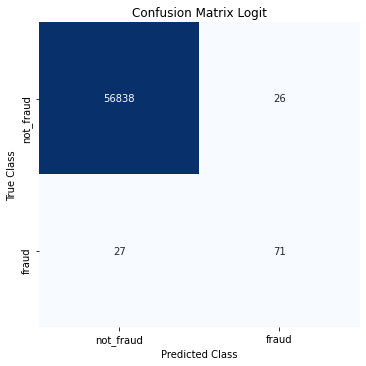

==================================**==================================
                   0
Accuracy    0.999070
Precision   0.731959
Recall      0.724490
F1 Score    0.728205
AUC         0.862016
==================================**==================================


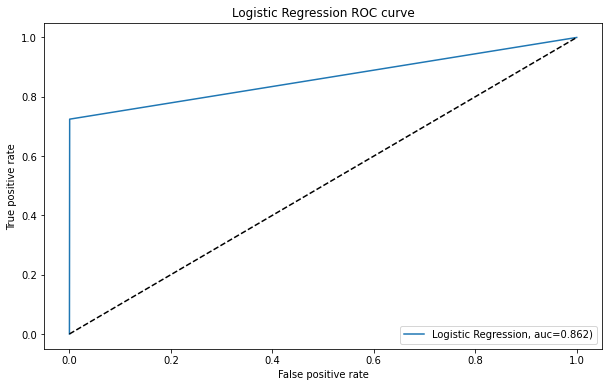

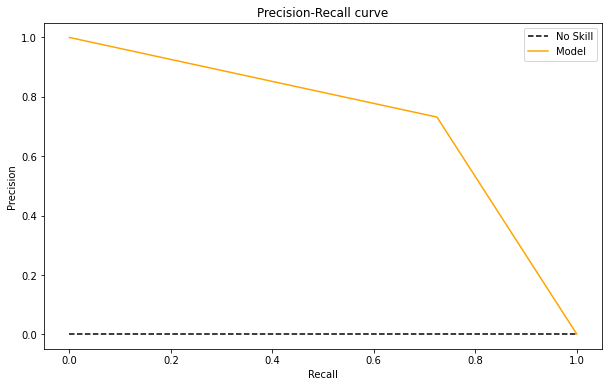

In [45]:
# DT results on RandomOverSampling data

model_RandomOverSampling_DT_pt = performDecisionTreeClassifier(X_over,y_over,"DT_RandomOverSampling_model.sav")
cv_RandomOverSampling_DT_results_pt = pd.DataFrame(model_RandomOverSampling_DT_pt.cv_results_)

#predictions
y_pred_RandomOverSampling_DT = model_RandomOverSampling_DT_pt.predict(X_test)

printResults(y_test,y_pred_RandomOverSampling_DT)

In [ ]:
# Random_Forest results on RandomOverSampling data

model_RandomOverSampling_Random_Forest_pt = performRandomForestClassifier(X_over,y_over,"Random_Forest_RandomOverSampling_model.sav")
cv_RandomOverSampling_Random_Forest_results_pt = pd.DataFrame(model_RandomOverSampling_Random_Forest_pt.cv_results_)

#predictions
y_pred_RandomOverSampling_Random_Forest = model_RandomOverSampling_Random_Forest_pt.predict(X_test)

printResults(y_test,y_pred_RandomOverSampling_Random_Forest)

In [ ]:

# XGB results on RandomOverSampling data

model_RandomOverSampling_XGB_pt = performXGBClassifier(X_over,y_over,"XGB_RandomOverSampling_model.sav")
cv_RandomOverSampling_XGB_results_pt = pd.DataFrame(model_RandomOverSampling_XGB_pt.cv_results_)

#predictions
y_pred_RandomOverSampling_XGB = model_RandomOverSampling_XGB_pt.predict(X_test)

printResults(y_test,y_pred_RandomOverSampling_XGB)

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

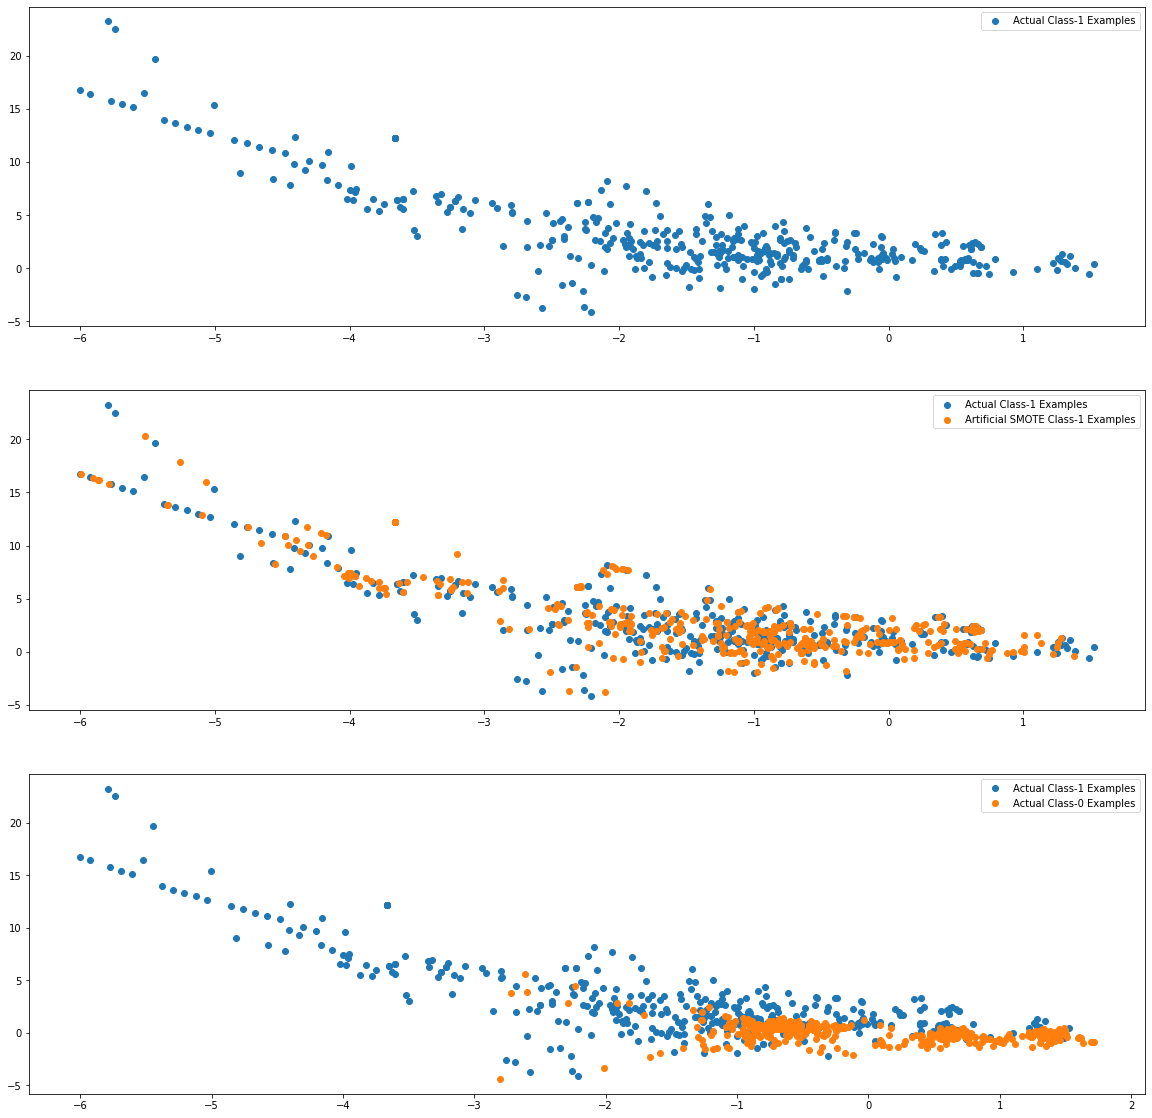

In [46]:
#import warnings
#warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
# logreg results on smote data

model_smote_logreg_pt = performLogisticRegression(X_train_smote,y_train_smote,"logreg_smote_model.sav")
cv_smote_results_pt = pd.DataFrame(model_smote_logreg_pt.cv_results_)

#predictions
y_pred_smote_logit = model_smote_logreg_pt.predict(X_test)

printResults(y_test,y_pred_smote_logit)

DT_smote_model.sav not found


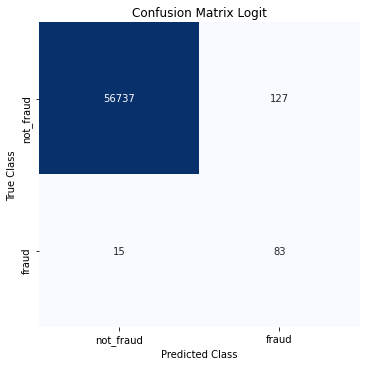

==================================**==================================
                   0
Accuracy    0.997507
Precision   0.395238
Recall      0.846939
F1 Score    0.538961
AUC         0.922353
==================================**==================================


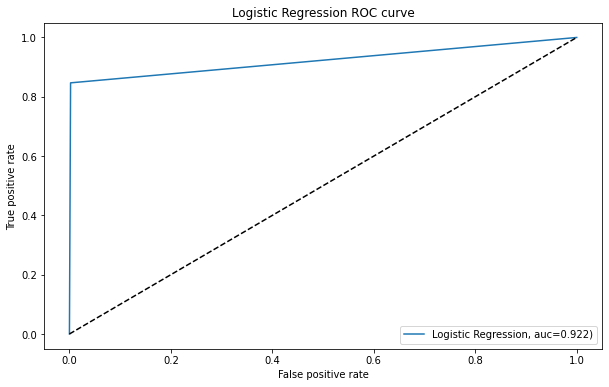

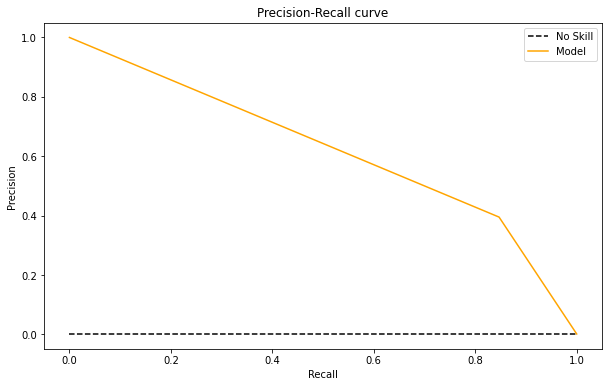

In [47]:
# DT results on smote data

model_smote_DT_pt = performDecisionTreeClassifier(X_train_smote,y_train_smote,"DT_smote_model.sav")
cv_smote_DT_results_pt = pd.DataFrame(model_smote_DT_pt.cv_results_)

#predictions
y_pred_smote_DT = model_smote_DT_pt.predict(X_test)

printResults(y_test,y_pred_smote_DT)

In [ ]:
# Random_Forest results on smote data

model_smote_Random_Forest_pt = performRandomForestClassifier(X_train_smote,y_train_smote,"Random_Forest_smote_model.sav")
cv_smote_Random_Forest_results_pt = pd.DataFrame(model_smote_Random_Forest_pt.cv_results_)

#predictions
y_pred_smote_Random_Forest = model_smote_Random_Forest_pt.predict(X_test)

printResults(y_test,y_pred_smote_Random_Forest)

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

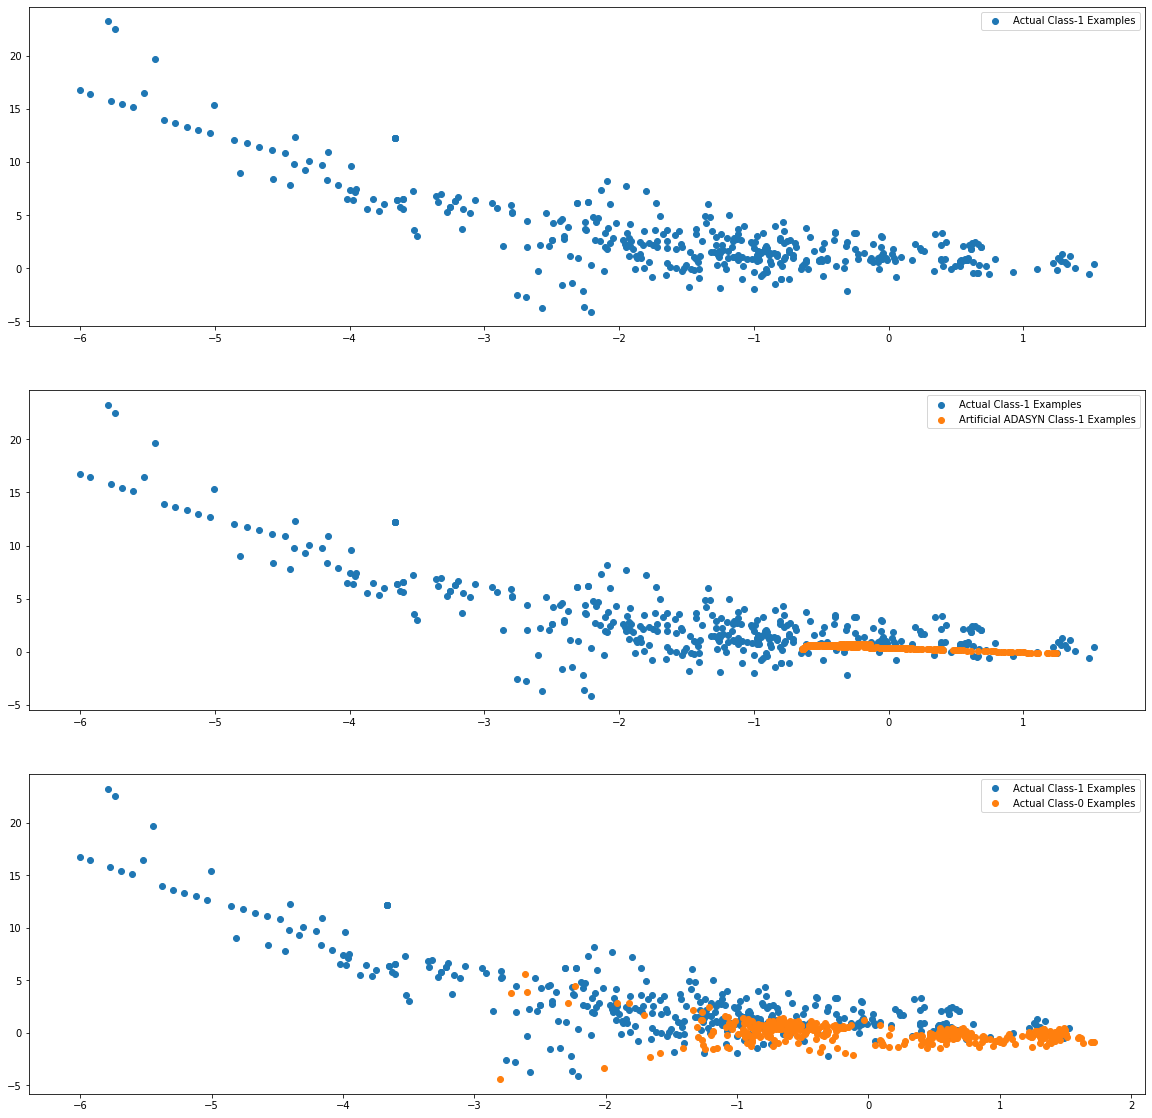

In [48]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


In [ ]:
# logreg results on ADASYN data

model_adasyn_logreg_pt = performLogisticRegression(X_train_adasyn,y_train_adasyn,"logreg_adasyn_model.sav")
cv_adasyn_results_pt = pd.DataFrame(model_adasyn_logreg_pt.cv_results_)

#predictions
y_pred_adasyn_logit = model_adasyn_logreg_pt.predict(X_test)

printResults(y_test,y_pred_adasyn_logit)

DT_adasyn_model.sav not found


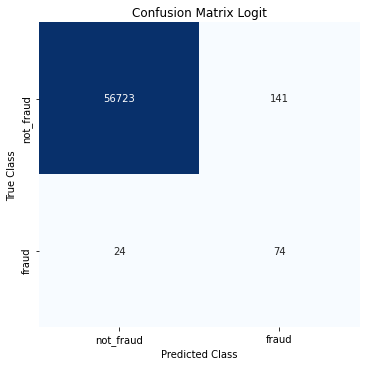

==================================**==================================
                   0
Accuracy    0.997103
Precision   0.344186
Recall      0.755102
F1 Score    0.472843
AUC         0.876311
==================================**==================================


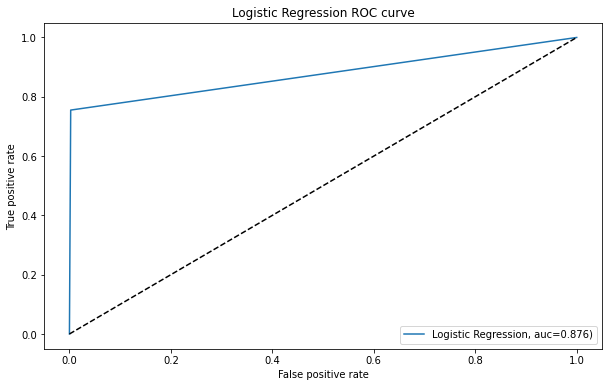

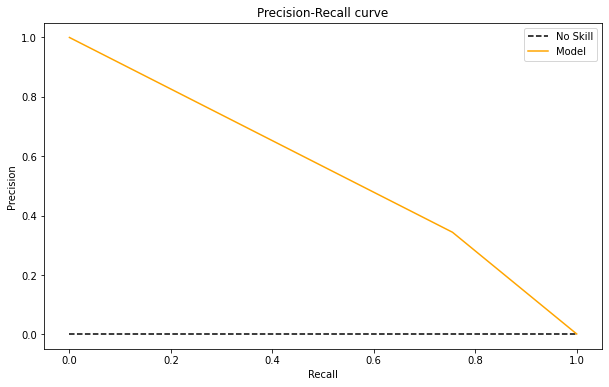

In [49]:
# DT results on ADASYN data

model_adasyn_DT_pt = performDecisionTreeClassifier(X_train_adasyn,y_train_adasyn,"DT_adasyn_model.sav")
cv_adasyn_DT_results_pt = pd.DataFrame(model_adasyn_DT_pt.cv_results_)

#predictions
y_pred_adasyn_DT = model_adasyn_DT_pt.predict(X_test)

printResults(y_test,y_pred_adasyn_DT)

In [ ]:
# Random_Forest results on ADASYN data

model_adasyn_Random_Forest_pt = performRandomForestClassifier(X_train_adasyn,y_train_adasyn,"Random_Forest_adasyn_model.sav")
cv_adasyn_Random_Forest_results_pt = pd.DataFrame(model_adasyn_Random_Forest_pt.cv_results_)

#predictions
y_pred_adasyn_Random_Forest = model_adasyn_Random_Forest_pt.predict(X_test)

printResults(y_test,y_pred_adasyn_Random_Forest)



In [ ]:
# XGB results on ADASYN data

model_adasyn_XGB_pt = performXGBClassifier(X_train_adasyn,y_train_adasyn,"XGB_adasyn_model.sav")
cv_adasyn_XGB_results_pt = pd.DataFrame(model_adasyn_XGB_pt.cv_results_)

#predictions
y_pred_adasyn_XGB = model_adasyn_XGB_pt.predict(X_test)

printResults(y_test,y_pred_adasyn_XGB)

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)